### Notebook for 6Nomads.com

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
# import dataframes
df_train = pd.read_csv('train.csv', header=-1)
df_test = pd.read_csv('test.csv', header=-1)

# join
df = pd.concat([df_train, df_test])

### Data inspection and cleaning

First I will look at the general characteristics of the dataset and see if it is necessary to perform any cleaning or reorganization.

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,-47,0,-5,-27,-11.0,-19.0,-2.0,-33.0,37,0,...,0,2,-4,-3,4,-23,-68,15,C,0
1,1,1,-2,-3,-1.0,-3.0,39.0,10.0,0,-1,...,-7,-2,1,6,-2,4,22,2,C,0
2,1,-4,-2,-6,-20.0,20.0,-1.0,-3.0,20,3,...,14,2,-2,0,23,21,-3,22,A,1
3,10,2,1,-7,-8.0,12.0,41.0,21.0,-14,3,...,2,1,2,-2,-8,-29,29,7,C,0
4,1,-3,-2,-6,1.0,0.0,10.0,-6.0,4,0,...,5,0,-3,-8,-11,-2,19,4,C,0


In [4]:
df[65].describe() # target

count    11678.000000
mean         1.501113
std          1.112784
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: 65, dtype: float64

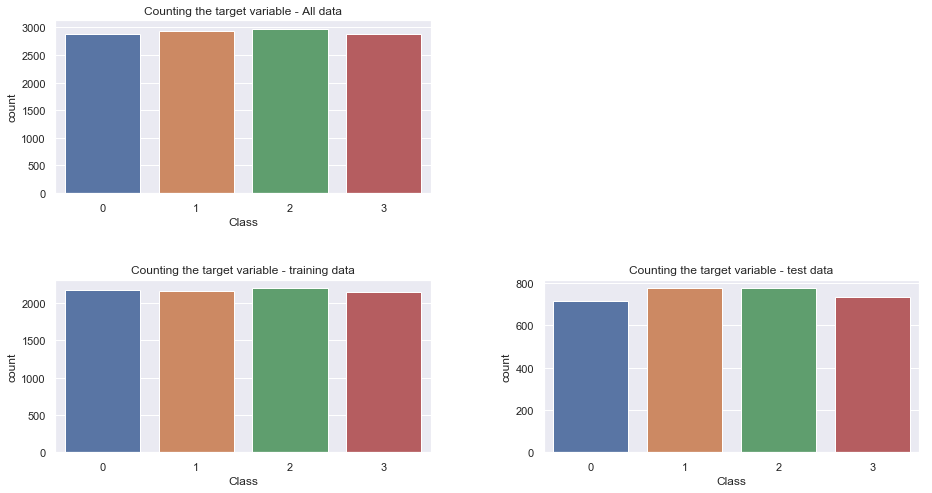

In [5]:
plt.subplot(2, 2, 1)
sns.countplot(df[65])
plt.title("Counting the target variable - All data")
plt.xlabel("Class")

plt.subplot(2, 2, 3)
sns.countplot(df_train[65])
plt.title("Counting the target variable - training data")
plt.xlabel("Class")

plt.subplot(2, 2, 4)
sns.countplot(df_test[65])
plt.title("Counting the target variable - test data")
plt.xlabel("Class")

plt.subplots_adjust(left=0, bottom=-0.5, right=2, top=1, wspace=0.3, hspace=0.5)
plt.show()

The target variable is almost equally distributed (we can consider balanced data)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11678 entries, 0 to 2999
Data columns (total 66 columns):
0     11678 non-null int64
1     11678 non-null int64
2     11678 non-null int64
3     11678 non-null int64
4     11677 non-null float64
5     11677 non-null float64
6     11677 non-null float64
7     11677 non-null float64
8     11678 non-null int64
9     11678 non-null int64
10    11678 non-null int64
11    11678 non-null int64
12    11678 non-null int64
13    11678 non-null int64
14    11676 non-null float64
15    11678 non-null int64
16    11678 non-null int64
17    11675 non-null float64
18    11677 non-null float64
19    11677 non-null float64
20    11678 non-null int64
21    11678 non-null int64
22    11677 non-null float64
23    11678 non-null int64
24    11678 non-null int64
25    11678 non-null int64
26    11678 non-null int64
27    11678 non-null int64
28    11678 non-null int64
29    11678 non-null int64
30    11678 non-null int64
31    11678 non-null int64
32    1167

In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,65
count,11678.000000,11678.000000,11678.000000,11678.000000,11677.000000,11677.000000,11677.000000,11677.000000,11678.000000,11678.000000,...,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000
mean,-0.458726,-0.692499,-0.747645,-0.659616,-0.276698,-0.420399,-1.296395,-0.740516,-0.584518,-0.569532,...,-1.013872,-0.826083,-0.709539,-0.788577,-0.687446,-0.281641,-0.688132,-1.253811,-0.544699,1.501113
std,18.794093,11.822496,4.958605,7.372727,17.914458,25.771968,25.008801,15.377319,18.284779,11.716408,...,14.893455,18.037223,11.893841,4.983341,7.342682,17.714179,25.404209,25.422806,15.335092,1.112784
min,-116.000000,-104.000000,-33.000000,-75.000000,-121.000000,-122.000000,-128.000000,-128.000000,-110.000000,-128.000000,...,-128.000000,-107.000000,-124.000000,-46.000000,-74.000000,-97.000000,-128.000000,-128.000000,-124.000000,0.000000
25%,-9.000000,-4.000000,-3.000000,-4.000000,-10.000000,-15.000000,-6.000000,-8.000000,-9.000000,-4.000000,...,-8.000000,-9.000000,-4.000000,-3.000000,-4.000000,-10.000000,-14.000000,-6.000000,-8.000000,1.000000
50%,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,2.000000
75%,7.000000,3.000000,2.000000,3.000000,10.000000,14.000000,4.000000,6.000000,7.000000,3.000000,...,5.000000,6.000000,3.000000,2.000000,3.000000,10.000000,13.000000,3.000000,6.000000,2.000000
max,111.000000,90.000000,30.000000,55.000000,92.000000,127.000000,127.000000,126.000000,127.000000,89.000000,...,108.000000,127.000000,105.000000,29.000000,51.000000,81.000000,127.000000,127.000000,123.000000,3.000000


Almost all columns are numeric except for one, and a few missing values are present. Let's see what is reasonable to fill in, if suitable.

In [8]:
# check the columns with missing data
df[df.columns[df.isnull().any()]].describe()

,4,5,6,7,14,17,18,19,22
count,11677.000000,11677.000000,11677.000000,11677.000000,11676.000000,11675.000000,11677.000000,11677.000000,11677.000000
mean,-0.276698,-0.420399,-1.296395,-0.740516,-1.248373,-0.729165,-0.771003,-0.714738,-1.009934
std,17.914458,25.771968,25.008801,15.377319,25.509962,12.023532,5.026528,7.571328,25.001351
min,-121.000000,-122.000000,-128.000000,-128.000000,-128.000000,-103.000000,-38.000000,-99.000000,-128.000000
25%,-10.000000,-15.000000,-6.000000,-8.000000,-6.000000,-4.000000,-3.000000,-4.000000,-5.000000
50%,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,10.000000,14.000000,4.000000,6.000000,4.000000,3.000000,2.000000,3.000000,4.000000
max,92.000000,127.000000,127.000000,126.000000,127.000000,118.000000,32.000000,47.000000,127.000000


It seems ok to replace with the mean:

In [9]:
# columns with missing values
col_missing = df.columns[df.isnull().any()]

# replace missing values with the respective mean
for i in col_missing:
    df[i] = df[i].fillna(np.mean(df[i]))

# checking again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11678 entries, 0 to 2999
Data columns (total 66 columns):
0     11678 non-null int64
1     11678 non-null int64
2     11678 non-null int64
3     11678 non-null int64
4     11678 non-null float64
5     11678 non-null float64
6     11678 non-null float64
7     11678 non-null float64
8     11678 non-null int64
9     11678 non-null int64
10    11678 non-null int64
11    11678 non-null int64
12    11678 non-null int64
13    11678 non-null int64
14    11678 non-null float64
15    11678 non-null int64
16    11678 non-null int64
17    11678 non-null float64
18    11678 non-null float64
19    11678 non-null float64
20    11678 non-null int64
21    11678 non-null int64
22    11678 non-null float64
23    11678 non-null int64
24    11678 non-null int64
25    11678 non-null int64
26    11678 non-null int64
27    11678 non-null int64
28    11678 non-null int64
29    11678 non-null int64
30    11678 non-null int64
31    11678 non-null int64
32    1167

Also, I'll transform the categorical variable in order to have only numeric columns.

In [10]:
df = pd.get_dummies(df)

I'll check for any eventual outliers. 

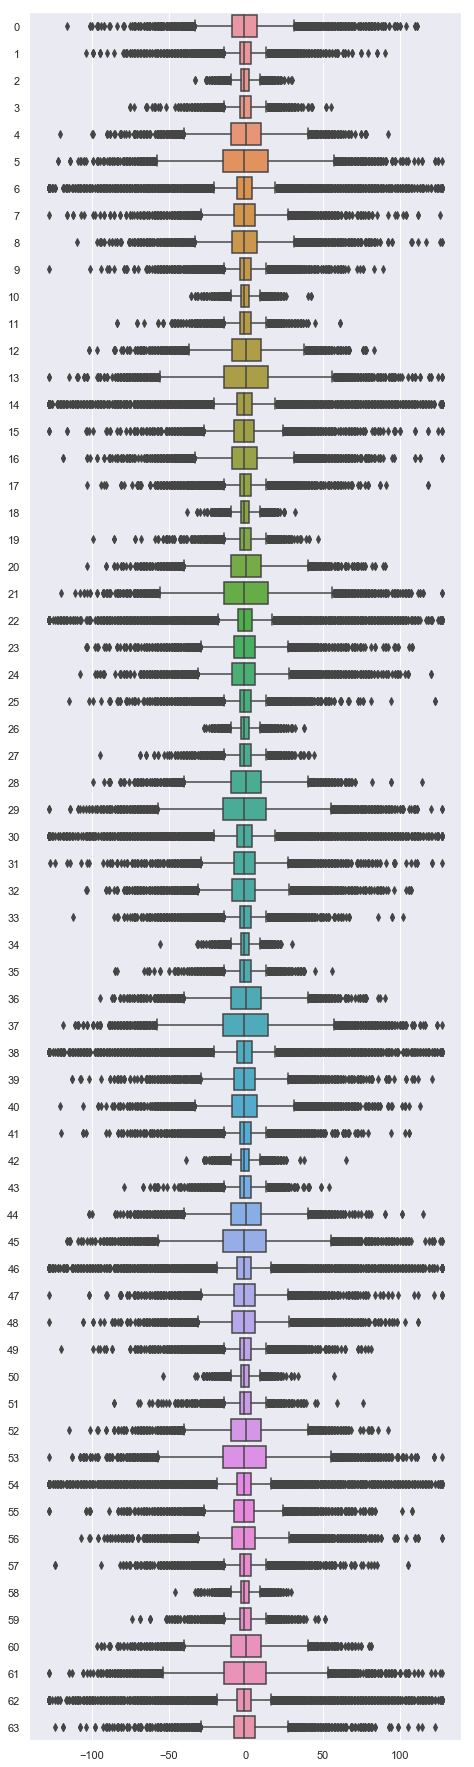

In [11]:
# boxplots
sns.boxplot(data=df.iloc[:, :-5], orient='h')  # we don't need to see the dummy and target variables

plt.subplots_adjust(left=0, bottom=-5, right=1, top=1, wspace=0.3, hspace=0.5)
plt.show()

For now I'll accept the data as it is, as without knowing what the variables represent it is a bit risky to make further assumptions and transformations on the data.

### Exploratory Data Analysis

Correlation between variables

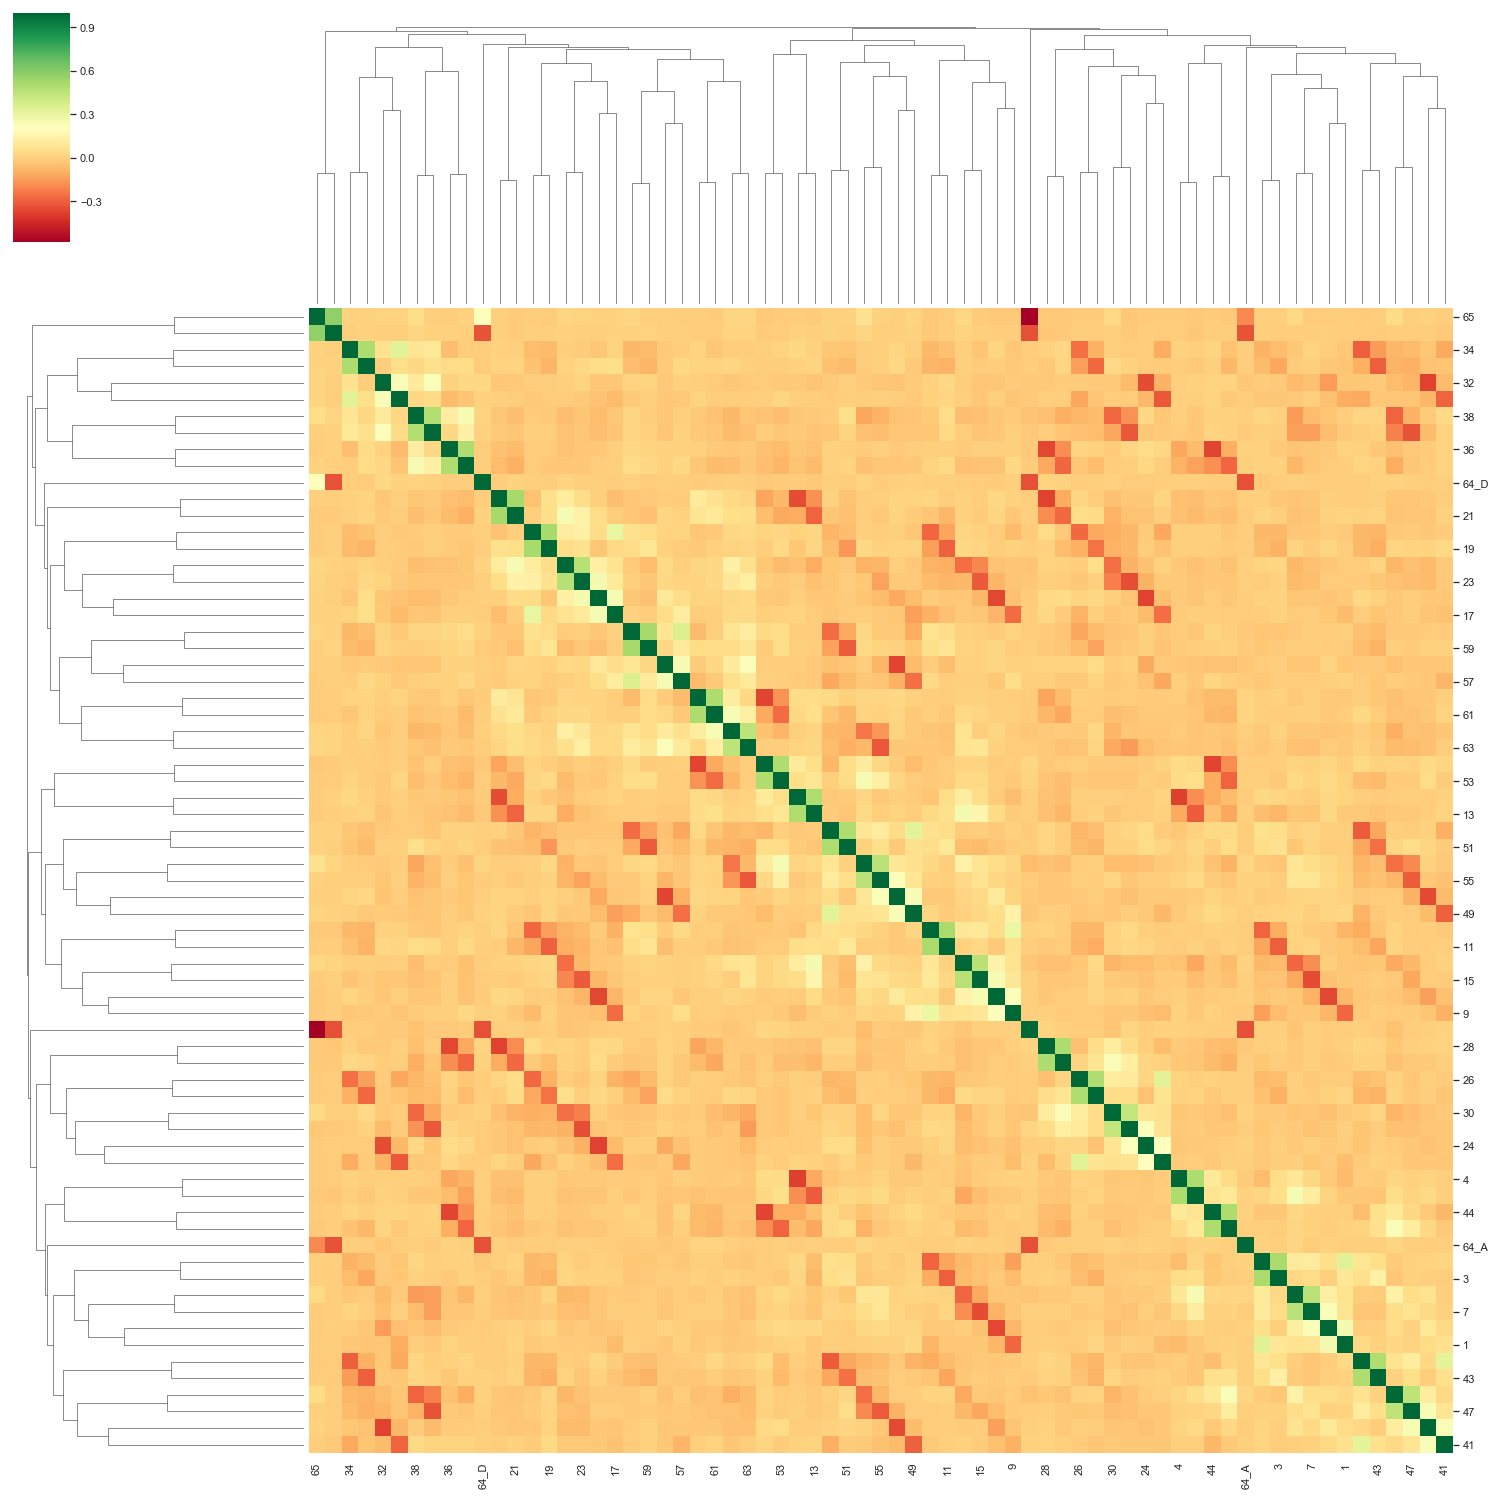

In [12]:
# clustermap
sns.clustermap(df.corr(method='pearson'), cmap='RdYlGn', annot=False)

plt.subplots_adjust(left=0, bottom=-1, right=2, top=1, wspace=0, hspace=0)
plt.show()

Variables are not much correlated with each other. Let's see with the target variable

In [13]:
# absolute values of the correlation with the target variable
abs(df.corr(method='pearson')[65]).sort_values(ascending=False) 

65      1.000000
64_C    0.578268
64_B    0.574950
64_D    0.198846
64_A    0.190747
54      0.067801
38      0.047782
46      0.038663
30      0.034110
6       0.033380
14      0.029706
22      0.023814
62      0.023325
31      0.022513
63      0.021517
58      0.020134
23      0.017847
32      0.017808
33      0.016711
5       0.016670
49      0.016436
9       0.015693
45      0.015100
8       0.014257
28      0.013718
34      0.013283
10      0.012613
52      0.012590
50      0.012366
35      0.011330
          ...   
15      0.009163
40      0.008975
53      0.008953
27      0.008618
13      0.008465
4       0.008451
17      0.008263
61      0.007980
25      0.007975
39      0.007243
47      0.007117
24      0.006113
56      0.006060
7       0.005402
48      0.005104
42      0.005026
43      0.004332
59      0.004097
3       0.004082
57      0.003493
20      0.003410
60      0.002797
41      0.002627
2       0.002394
11      0.001486
1       0.001377
12      0.000977
0       0.0006

We see that the categorical variable (number 64) is the only one which has significant correlation with the target.

In [14]:
# Correlation between the target variable and the categorical dummy variables
df[['64_A', '64_B', '64_C', '64_D', 65]].corr(method='pearson').iloc[-1, :][:-1].sort_values(ascending=False)

64_B    0.574950
64_D    0.198846
64_A   -0.190747
64_C   -0.578268
Name: 65, dtype: float64

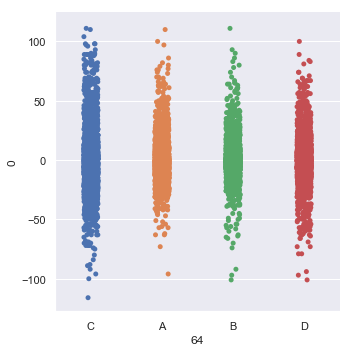

In [15]:
initial_df = pd.concat([df_train, df_test])

sns.catplot(x=64, y=0, data=initial_df)
plt.show()

Other variables

Just to get a sense of the distribution of the variables:

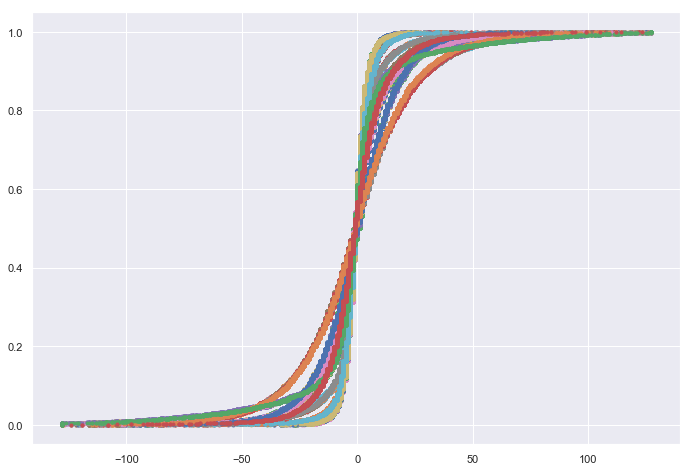

In [16]:
# ECDF function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

for i in df.iloc[:, :-5].columns:
    x, y = ecdf(df[i])
    plt.plot(x, y, marker='.', linestyle='none')
    
plt.subplots_adjust(left=0, bottom=-0.5, right=1.5, top=1, wspace=0, hspace=0)
plt.show()

Some variables close to a normal distribution, but in general they differ a lot.

### Modeling

In [17]:
from sklearn.preprocessing import scale

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

In [18]:
# define seed for comparability
SEED = 50

Dealing with the missing values

In [19]:
# columns with missing values
col_missing = df_train.columns[df_train.isnull().any()]

# replace missing values with the respective mean
for i in col_missing:
    df_train[i] = df_train[i].fillna(np.mean(df_train[i]))
    
##############################################################
    
# columns with missing values
col_missing = df_test.columns[df_test.isnull().any()]

# replace missing values with the respective mean
for i in col_missing:
    df_test[i] = df_test[i].fillna(np.mean(df_test[i]))

In [20]:
# build scaled numerical features
X_train = scale(pd.get_dummies(df_train.drop(65, axis=1)).astype(float))
X_test = scale(pd.get_dummies(df_test.drop(65, axis=1)).astype(float))

# target
y_train = df_train[65]
y_test = df_test[65]

I will first run some models with default parameters.

#### Logistic Regression

In [21]:
# Instatiate logreg
logreg = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=SEED)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# predict
y_pred = logreg.predict(X_test)

In [22]:
model = logreg
model_name = 'LogisticRegression'

# score
print("Score:", model.score(X_test, y_test))

# Confusion matrix
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification report:\n", classification_report(y_test, y_pred))

Score: 0.24533333333333332

Confusion matrix:
 [[183 185 173 171]
 [213 197 169 198]
 [205 189 181 202]
 [185 192 182 175]]

Classification report:
               precision    recall  f1-score   support

           0       0.23      0.26      0.24       712
           1       0.26      0.25      0.26       777
           2       0.26      0.23      0.24       777
           3       0.23      0.24      0.24       734

   micro avg       0.25      0.25      0.25      3000
   macro avg       0.25      0.25      0.25      3000
weighted avg       0.25      0.25      0.25      3000



#### KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier 

In [24]:
# k-NN classifier 
knn = KNeighborsClassifier()

# fit
knn.fit(X_train, y_train)

# Predict the labels for the training data X
y_pred = knn.predict(X_test)

In [25]:
model = knn
model_name = 'KNeighborsClassifier'

# score
print("Score:", model.score(X_test, y_test))

# Confusion matrix
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification report:\n", classification_report(y_test, y_pred))

Score: 0.5076666666666667

Confusion matrix:
 [[446 106  66  94]
 [ 57 446  91 183]
 [ 85 207 302 183]
 [ 88 193 124 329]]

Classification report:
               precision    recall  f1-score   support

           0       0.66      0.63      0.64       712
           1       0.47      0.57      0.52       777
           2       0.52      0.39      0.44       777
           3       0.42      0.45      0.43       734

   micro avg       0.51      0.51      0.51      3000
   macro avg       0.52      0.51      0.51      3000
weighted avg       0.51      0.51      0.51      3000



#### DecisionTreeClassifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train) 

# Predict 
y_pred = dt.predict(X_test)

In [27]:
model = dt
model_name = 'DecisionTreeClassifier'

# score
print("Score:", model.score(X_test, y_test))

# Confusion matrix
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification report:\n", classification_report(y_test, y_pred))

Score: 0.24533333333333332

Confusion matrix:
 [[183 185 173 171]
 [213 197 169 198]
 [205 189 181 202]
 [185 192 182 175]]

Classification report:
               precision    recall  f1-score   support

           0       0.23      0.26      0.24       712
           1       0.26      0.25      0.26       777
           2       0.26      0.23      0.24       777
           3       0.23      0.24      0.24       734

   micro avg       0.25      0.25      0.25      3000
   macro avg       0.25      0.25      0.25      3000
weighted avg       0.25      0.25      0.25      3000



#### AdaBoostClassifier

In [28]:
# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, random_state=SEED)

# Fit ada to the training set
ada.fit(X_train, y_train)

# Predict test set labels
y_pred = ada.predict(X_test)

In [29]:
model = ada
model_name = 'AdaBoostClassifier'

# score
print("Score:", model.score(X_test, y_test))

# Confusion matrix
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification report:\n", classification_report(y_test, y_pred))

Score: 0.24533333333333332

Confusion matrix:
 [[183 185 173 171]
 [213 197 169 198]
 [205 189 181 202]
 [185 192 182 175]]

Classification report:
               precision    recall  f1-score   support

           0       0.23      0.26      0.24       712
           1       0.26      0.25      0.26       777
           2       0.26      0.23      0.24       777
           3       0.23      0.24      0.24       734

   micro avg       0.25      0.25      0.25      3000
   macro avg       0.25      0.25      0.25      3000
weighted avg       0.25      0.25      0.25      3000



#### RandomForestClassifier

In [30]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate ada
rf = RandomForestClassifier(n_estimators=10, random_state=SEED)

# Fit ada to the training set
rf.fit(X_train, y_train)

# Predict test set labels
y_pred = rf.predict(X_test)

In [31]:
model = rf
model_name = 'RandomForestClassifier'

# score
print("Score:", model.score(X_test, y_test))

# Confusion matrix
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification report:\n", classification_report(y_test, y_pred))

Score: 0.251

Confusion matrix:
 [[200 166 174 172]
 [213 197 169 198]
 [205 189 181 202]
 [186 191 182 175]]

Classification report:
               precision    recall  f1-score   support

           0       0.25      0.28      0.26       712
           1       0.27      0.25      0.26       777
           2       0.26      0.23      0.24       777
           3       0.23      0.24      0.24       734

   micro avg       0.25      0.25      0.25      3000
   macro avg       0.25      0.25      0.25      3000
weighted avg       0.25      0.25      0.25      3000



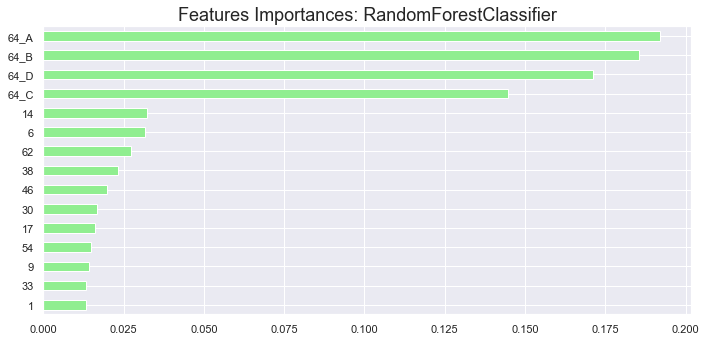

In [32]:
# Create a pd.Series of features importances
importances = pd.Series(data=model.feature_importances_, index=df.drop(65, 1).columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.tail(15).plot(kind='barh', color='lightgreen')
plt.title('Features Importances: {}'.format(model_name), fontsize=18)
plt.subplots_adjust(left=0, bottom=0, right=1.5, top=1, wspace=0, hspace=0)
plt.show()

Again, looking at the feature importances of the Random Forest algorithm, we confirm the relative importance of the categorical variable when comparing to the remaining numerical variables, which have a minimal effect.

#### LinearSVC

In [33]:
from sklearn.svm import LinearSVC

# Instantiate
svm = LinearSVC()

# fit to the training set
svm.fit(X_train, y_train)

# Predict test set labels
y_pred = svm.predict(X_test)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [34]:
model = svm
model_name = 'LinearSVC'

# score
print("Score:", model.score(X_test, y_test))

# Confusion matrix
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification report:\n", classification_report(y_test, y_pred))

Score: 0.24533333333333332

Confusion matrix:
 [[183 185 173 171]
 [213 197 169 198]
 [205 189 181 202]
 [185 192 182 175]]

Classification report:
               precision    recall  f1-score   support

           0       0.23      0.26      0.24       712
           1       0.26      0.25      0.26       777
           2       0.26      0.23      0.24       777
           3       0.23      0.24      0.24       734

   micro avg       0.25      0.25      0.25      3000
   macro avg       0.25      0.25      0.25      3000
weighted avg       0.25      0.25      0.25      3000



#### SGDClassifier

In [35]:
from sklearn.linear_model import SGDClassifier

# Instantiate
linear_classifier = SGDClassifier(random_state=SEED)

# fit to the training set
linear_classifier.fit(X_train, y_train)

# Predict test set labels
y_pred = linear_classifier.predict(X_test)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [36]:
model = linear_classifier
model_name = 'SGDClassifier'

# score
print("Score:", model.score(X_test, y_test))

# Confusion matrix
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification report:\n", classification_report(y_test, y_pred))

Score: 0.24533333333333332

Confusion matrix:
 [[183 185 173 171]
 [213 197 169 198]
 [205 189 181 202]
 [185 192 182 175]]

Classification report:
               precision    recall  f1-score   support

           0       0.23      0.26      0.24       712
           1       0.26      0.25      0.26       777
           2       0.26      0.23      0.24       777
           3       0.23      0.24      0.24       734

   micro avg       0.25      0.25      0.25      3000
   macro avg       0.25      0.25      0.25      3000
weighted avg       0.25      0.25      0.25      3000



#### Support Vector Machine

In [37]:
from sklearn.svm import SVC

# Instantiate the SVC classifier: clf
clf = SVC(random_state=SEED, C=1)

# fit to the training set
clf.fit(X_train, y_train)

# Predict test set labels
y_pred = clf.predict(X_test)

In [38]:
model = clf
model_name = 'SVC'

# score
print("Score:", model.score(X_test, y_test))

# Confusion matrix
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification report:\n", classification_report(y_test, y_pred))

Score: 0.33866666666666667

Confusion matrix:
 [[380 103 118 111]
 [213 197 169 198]
 [196 150 246 185]
 [183 186 172 193]]

Classification report:
               precision    recall  f1-score   support

           0       0.39      0.53      0.45       712
           1       0.31      0.25      0.28       777
           2       0.35      0.32      0.33       777
           3       0.28      0.26      0.27       734

   micro avg       0.34      0.34      0.34      3000
   macro avg       0.33      0.34      0.33      3000
weighted avg       0.33      0.34      0.33      3000



Considering default parameterization, the model with the best performance was by far KNN, even with not so great results.

In [39]:
# k-NN classifier 
knn = KNeighborsClassifier()

# fit
knn.fit(X_train, y_train)

# Predict the labels for the training data X
y_pred = knn.predict(X_test)

model = knn
model_name = 'KNeighborsClassifier'

# score
print("Score:", model.score(X_test, y_test))

# Confusion matrix
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification report:\n", classification_report(y_test, y_pred))

Score: 0.5076666666666667

Confusion matrix:
 [[446 106  66  94]
 [ 57 446  91 183]
 [ 85 207 302 183]
 [ 88 193 124 329]]

Classification report:
               precision    recall  f1-score   support

           0       0.66      0.63      0.64       712
           1       0.47      0.57      0.52       777
           2       0.52      0.39      0.44       777
           3       0.42      0.45      0.43       734

   micro avg       0.51      0.51      0.51      3000
   macro avg       0.52      0.51      0.51      3000
weighted avg       0.51      0.51      0.51      3000



### Feature Selection

Let's try to use a model with the most important variables.

In [40]:
# feature selection with RFE and RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

steps = 2
n_features = 4

# Recursive Feature Elimination
rfe = RFE(estimator=RandomForestClassifier(n_estimators=10, random_state=SEED), 
          n_features_to_select=n_features, 
          step=steps,
          verbose=1)

# fit
rfe.fit(X_train, y_train)

# predict
y_pred = rfe.predict(X_test)

print("\n With {} features, new score using RFE: {}".format(n_features, accuracy_score(y_test, y_pred)))

Fitting estimator with 68 features.
Fitting estimator with 66 features.
Fitting estimator with 64 features.
Fitting estimator with 62 features.
Fitting estimator with 60 features.
Fitting estimator with 58 features.
Fitting estimator with 56 features.
Fitting estimator with 54 features.
Fitting estimator with 52 features.
Fitting estimator with 50 features.
Fitting estimator with 48 features.
Fitting estimator with 46 features.
Fitting estimator with 44 features.
Fitting estimator with 42 features.
Fitting estimator with 40 features.
Fitting estimator with 38 features.
Fitting estimator with 36 features.
Fitting estimator with 34 features.
Fitting estimator with 32 features.
Fitting estimator with 30 features.
Fitting estimator with 28 features.
Fitting estimator with 26 features.
Fitting estimator with 24 features.
Fitting estimator with 22 features.
Fitting estimator with 20 features.
Fitting estimator with 18 features.
Fitting estimator with 16 features.
Fitting estimator with 14 fe

In [41]:
print(dict(zip(pd.get_dummies(df_train.drop(65, 1)).columns, rfe.ranking_)))

{0: 27, 1: 8, 2: 26, 3: 17, 4: 18, 5: 7, 6: 5, 7: 33, 8: 17, 9: 6, 10: 28, 11: 18, 12: 16, 13: 9, 14: 3, 15: 28, 16: 12, 17: 11, 18: 23, 19: 24, 20: 10, 21: 15, 22: 4, 23: 20, 24: 22, 25: 11, 26: 22, 27: 21, 28: 16, 29: 9, 30: 13, 31: 30, 32: 31, 33: 10, 34: 26, 35: 25, 36: 33, 37: 12, 38: 6, 39: 24, 40: 32, 41: 3, 42: 32, 43: 14, 44: 20, 45: 7, 46: 5, 47: 27, 48: 15, 49: 4, 50: 29, 51: 21, 52: 19, 53: 13, 54: 2, 55: 23, 56: 30, 57: 14, 58: 31, 59: 29, 60: 19, 61: 8, 62: 2, 63: 25, '64_A': 1, '64_B': 1, '64_C': 1, '64_D': 1}


Let's try:

In [42]:
# Defining most important variables - until ranking=x
ranking_x = 4

imp_variables = pd.get_dummies(df_train.drop(65, 1)).columns[rfe.ranking_ < ranking_x].tolist()
imp_variables

[14, 41, 54, 62, '64_A', '64_B', '64_C', '64_D']

In [43]:
# replacing 64
imp_variables.pop(-1)
imp_variables.pop(-1)
imp_variables.pop(-1)
imp_variables.pop(-1)
imp_variables.append(64)
imp_variables

[14, 41, 54, 62, 64]

Let's try to change ranking_x until we have the best score

In [44]:
# considering the range

for i in range(2, 30):
    
    ranking_x = i
    
    imp_variables = pd.get_dummies(df_train.drop(65, 1)).columns[rfe.ranking_ < ranking_x].tolist()
    imp_variables.pop(-1)
    imp_variables.pop(-1)
    imp_variables.pop(-1)
    imp_variables.pop(-1)
    imp_variables.append(64)
    
    # New model
    X_train_new = pd.get_dummies(df_train[imp_variables]).astype(float).values
    X_test_new = pd.get_dummies(df_test[imp_variables]).astype(float).values
    
    # k-NN classifier 
    knn = KNeighborsClassifier()
    
    model = knn
    model_name = 'KNeighborsClassifier'

    # fit
    knn.fit(X_train_new, y_train)

    # Predict the labels for the training data X
    y_pred = knn.predict(X_test_new)

    # score
    print("With a RFE ranking until {}, the score is {}:".format(ranking_x, model.score(X_test_new, y_test)))
    

With a RFE ranking until 2, the score is 0.24533333333333332:
With a RFE ranking until 3, the score is 0.4676666666666667:
With a RFE ranking until 4, the score is 0.78:
With a RFE ranking until 5, the score is 0.8376666666666667:
With a RFE ranking until 6, the score is 0.8506666666666667:
With a RFE ranking until 7, the score is 0.8653333333333333:
With a RFE ranking until 8, the score is 0.8166666666666667:
With a RFE ranking until 9, the score is 0.8086666666666666:
With a RFE ranking until 10, the score is 0.768:
With a RFE ranking until 11, the score is 0.77:
With a RFE ranking until 12, the score is 0.7746666666666666:
With a RFE ranking until 13, the score is 0.7653333333333333:
With a RFE ranking until 14, the score is 0.7666666666666667:
With a RFE ranking until 15, the score is 0.7643333333333333:
With a RFE ranking until 16, the score is 0.7673333333333333:
With a RFE ranking until 17, the score is 0.7696666666666667:
With a RFE ranking until 18, the score is 0.762666666666

7 seems to be the optimal number:

In [45]:
# optimal RFE ranking
ranking_x = 7
    
imp_variables = pd.get_dummies(df_train.drop(65, 1)).columns[rfe.ranking_ < ranking_x].tolist()
imp_variables.pop(-1)
imp_variables.pop(-1)
imp_variables.pop(-1)
imp_variables.pop(-1)
imp_variables.append(64)

print("Important variables: {}\n".format(imp_variables))
  
# New model
X_train_new = pd.get_dummies(df_train[imp_variables]).astype(float).values
X_test_new = pd.get_dummies(df_test[imp_variables]).astype(float).values
   
# k-NN classifier 
knn = KNeighborsClassifier()
    
model = knn
model_name = 'KNeighborsClassifier'

# fit
knn.fit(X_train_new, y_train)

# Predict the labels for the training data X
y_pred = knn.predict(X_test_new)

# score
print("With a RFE ranking until {}, the score is {}:".format(ranking_x, model.score(X_test_new, y_test)))

# Confusion matrix
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification report:\n", classification_report(y_test, y_pred))

Important variables: [6, 9, 14, 22, 38, 41, 46, 49, 54, 62, 64]

With a RFE ranking until 7, the score is 0.8653333333333333:

Confusion matrix:
 [[636   0  16  60]
 [  0 753   6  18]
 [  4  98 598  77]
 [  6 103  16 609]]

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.94       712
           1       0.79      0.97      0.87       777
           2       0.94      0.77      0.85       777
           3       0.80      0.83      0.81       734

   micro avg       0.87      0.87      0.87      3000
   macro avg       0.88      0.87      0.87      3000
weighted avg       0.88      0.87      0.87      3000



### Hyperparameter Tuning

Assuming now this model, I'll try to further tune the KNN parameters

In [46]:
from sklearn.model_selection import GridSearchCV

# model
knn = KNeighborsClassifier()

# Set the hyperparameter grid of knn
params_knn = {'n_neighbors': [2, 5, 7],
              'weights': ['uniform', 'distance'],
              'leaf_size': [30, 20, 40],
              'p': [2, 1]             
             }

# GridSearchCV
grid_knn = GridSearchCV(estimator=knn, param_grid=params_knn, cv=3, n_jobs=-1)

# Fit to the training set
grid_knn.fit(X_train_new, y_train)      

# Extract best hyperparameters
best_hyperparams = grid_knn.best_params_
print('Best hyperparameters:\n', best_hyperparams)

Best hyperparameters:
 {'leaf_size': 30, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


#### Model performance

In [47]:
model = grid_knn
model_name = 'Tuned KNeighborsClassifier'

# Extract best model
best_model = model.best_estimator_

# Predict the test set labels
y_pred = best_model.predict(X_test_new)

# score
print("Score:", model.score(X_test_new, y_test))

# Confusion matrix
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification report:\n", classification_report(y_test, y_pred))

Score: 0.9996666666666667

Confusion matrix:
 [[712   0   0   0]
 [  0 777   0   0]
 [  0   0 777   0]
 [  0   1   0 733]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       712
           1       1.00      1.00      1.00       777
           2       1.00      1.00      1.00       777
           3       1.00      1.00      1.00       734

   micro avg       1.00      1.00      1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



We now have an almost perfect classification when considering this tuned model. The key parameter here was the 'weight' parameter, as without changing it the performance would remain very similar. 

In fact, if we consider the 'distance' parameter instead of an uniform weight (default), the points are now weighted by the inverse of their distance, which means that closer neighbors of a query point will have relatively greater influence.

The effect of this variable is so dramatic that it could be nice to test different models but with this weight consideration. And if we had the name of the variables, further interesting considerations could come up.